In [1]:

from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from scipy.stats import entropy
from statsmodels.tsa import stattools
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import *

from sklearn.datasets import load_digits
from scipy.io import arff

from sklearn.feature_selection import SelectKBest, chi2

In [2]:


#DATASET de train
dfLTraining = pd.read_csv('BATADAL_dataset03.csv',header=0) #
#DATASET de test non competitif
dfLTrainingAttack = pd.read_csv('BATADAL_dataset04.csv',header=0) #


#Dataset de test competitif (NE PAS FAIRE DE FIT DESSUS) !! 
dfLTest = pd.read_csv('BATADAL_test_dataset.csv',header=0) #
dfLTestLabeled = pd.read_csv('BATADAL_test_dataset_Label.csv',header=0) #
#Dataset de test competitif (NE PAS FAIRE DE FIT DESSUS) !! 



dfLTestLabeled.columns = dfLTraining.columns.values
dfLTrainingAttack.columns = dfLTraining.columns.values
dfLTest.columns = dfLTraining.columns.values[:-1]

In [3]:
#BATADAL_dataset04 avec les corrections des labels
dfLTrainingAttackFullyLabeled = pd.read_csv('BATADAL_dataset04_FullyLabeled.csv',header=0) #
dfLTrainingAttackFullyLabeled.columns = dfLTraining.columns.values

In [4]:
flag = 0
for index in range(0,len(dfLTrainingAttackFullyLabeled)):

    if (flag == 1) and (dfLTrainingAttackFullyLabeled['ATT_FLAG'][index] == 2):
        #print("désac ", index)
        dfLTrainingAttackFullyLabeled['ATT_FLAG'][index] = 1
        flag = 0    
    elif (flag == 0) and (dfLTrainingAttackFullyLabeled['ATT_FLAG'][index] == 2):
        #print("actt", index)
        flag = 1    
    if flag == 1:
        dfLTrainingAttackFullyLabeled['ATT_FLAG'][index] = 1
    
    

/home/AI357/.local/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/home/AI357/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
#flag = 0
#flagSup = 0
#for index in range(0,len(dfLTrainingAttackFullyLabeled)):
 #   if flag == 1 and dfLTrainingAttackFullyLabeled['ATT_FLAG'][index] == 1:
       # if dfLTrainingAttackFullyLabeled['ATT_FLAG'][index+1] == 1:
      #      flagSup = 1
       # if flagSup == 1 and dfLTrainingAttackFullyLabeled['ATT_FLAG'][index + 1 ] == 0:
     #       flagSup = 0
    #    elif flagSup == 0 and dfLTrainingAttackFullyLabeled['ATT_FLAG'][index + 1 ] == 0:
   #         flag = 0
            
  #  if flag == 0 and dfLTrainingAttackFullyLabeled['ATT_FLAG'][index] == 1:
 #       flag = 1      
    
#    if flag == 1:
 #       dfLTrainingAttackFullyLabeled['ATT_FLAG'][index] = 1
    
    

In [7]:
print('répartition attaque pour dfLTraining :\n ',pd.Series(dfLTraining['ATT_FLAG']).value_counts())
print('\n\n')
print('répartition attaque pour dfLTrainingAttack :\n ',pd.Series(dfLTrainingAttack['ATT_FLAG']).value_counts())

#print('répartition attaque pour dfLTest : ',pd.Series(dfLTest['ATT_FLAG']).value_counts())

print('\n\n')
print('répartition attaque pour dfLTestAttack :\n ',pd.Series(dfLTestLabeled['ATT_FLAG']).value_counts())



répartition attaque pour dfLTraining :
  0    8761
Name: ATT_FLAG, dtype: int64



répartition attaque pour dfLTrainingAttack :
  -999    3958
 1       219
Name: ATT_FLAG, dtype: int64



répartition attaque pour dfLTestAttack :
  0.0    1682
1.0     407
Name: ATT_FLAG, dtype: int64


In [8]:
#-999 = normal
#1 = anormal
dfLTrainingAttack=dfLTrainingAttack.replace({-999: 0})
dfLTrainingAttackFullyLabeled=dfLTrainingAttackFullyLabeled.replace({-999: 0})

In [9]:
#valeurs Nan

In [10]:
print(dfLTraining.isnull().sum(axis = 0).any())
print(dfLTrainingAttack.isnull().sum(axis = 0).any())
print(dfLTest.isnull().sum(axis = 0).any())
print(dfLTestLabeled.isnull().sum(axis = 0).any())

False
False
False
False


In [11]:
#for c in dfLTraining.columns.values[1:]:
 #   dfLTraining[c] = pd.to_numeric(dfLTraining[c]) 

In [12]:
print((~np.isfinite(dfLTraining[dfLTraining.columns.values[1:]]).all()).any()) # check for inf values
print((~np.isfinite(dfLTrainingAttack[dfLTrainingAttack.columns.values[1:]]).all()).any())
print((~np.isfinite(dfLTest[dfLTest.columns.values[1:]]).all()).any())
print((~np.isfinite(dfLTestLabeled[dfLTestLabeled.columns.values[1:]]).all()).any())

False
False
False
False


In [13]:
variablesDiscretes = [
'S_PU1',
'S_PU2',
'S_PU3',
'S_PU4',
'S_PU5',
'S_PU6',
'S_PU7',
'S_PU8',
'S_PU9',
'S_PU10',
'S_PU11',
'S_V2']

In [ ]:
### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ### ##
##essayons de comprendre l'attaque n 1

#l'attaque consiste à faire baisser le niveau d'eau de T3 par replay attack

In [98]:
pd.DataFrame(attackTab[1])[['L_T3','P_J300','L_T2','P_J289']].mean()

L_T3       4.209000
P_J300    27.266429
L_T2       2.821286
P_J289    27.286857
dtype: float64

In [97]:
pd.DataFrame(attackTab[1])[['F_PU4','F_PU5','P_J256', 'L_T3','P_J289']].values

array([[  0.  ,   0.  ,  71.48,   3.92,  26.96],
       [  0.  ,   0.  ,  69.31,   3.59,  26.43],
       [  0.  ,   0.  ,  86.55,   3.21,  22.82],
       [ 36.99,   0.  ,  87.14,   3.32,  22.09],
       [ 36.57,   0.  ,  92.27,   3.91,  25.61],
       [ 35.61,   0.  ,  88.21,   4.18,  21.09],
       [ 35.73,   0.  ,  89.15,   4.81,  25.58],
       [ 35.51,   0.  ,  73.34,   5.19,  27.69],
       [  0.  ,   0.  ,  72.85,   5.23,  28.08],
       [  0.  ,   0.  ,  72.25,   4.6 ,  28.35],
       [  0.  ,   0.  ,  71.34,   4.22,  28.75],
       [  0.  ,   0.  ,  68.64,   3.81,  31.34],
       [  0.  ,   0.  ,  69.44,   3.35,  29.2 ],
       [ 36.27,   0.  ,  69.46,   3.  ,  29.42],
       [ 34.86,   0.  ,  67.97,   3.55,  29.6 ],
       [ 35.74,   0.  ,  68.91,   4.24,  29.99],
       [ 33.46,   0.  ,  72.08,   4.47,  30.19],
       [ 33.85,   0.  ,  71.59,   5.05,  30.46],
       [  0.  ,   0.  ,  71.92,   4.96,  31.03],
       [  0.  ,   0.  ,  71.77,   5.  ,  30.27],
       [  0.  ,   0.

In [96]:
dfLTestLabeled[['L_T3','P_J300','L_T2','P_J289']][0:400].mean()


L_T3       4.213300
P_J300    27.912925
L_T2       3.371775
P_J289    27.924400
dtype: float64

In [94]:
dfLTestLabeled[['F_PU4','F_PU5','P_J256', 'L_T3']][0:100].values

array([[33.96,  0.  , 90.54,  4.  ],
       [34.02,  0.  , 90.43,  4.53],
       [33.33,  0.  , 91.72,  5.03],
       [ 0.  ,  0.  , 76.12,  5.16],
       [ 0.  ,  0.  , 75.68,  4.94],
       [ 0.  ,  0.  , 75.27,  4.71],
       [ 0.  ,  0.  , 75.46,  4.46],
       [ 0.  ,  0.  , 71.26,  4.24],
       [ 0.  ,  0.  , 69.82,  3.84],
       [ 0.  ,  0.  , 70.54,  3.4 ],
       [37.22,  0.  , 87.51,  3.01],
       [37.33,  0.  , 87.23,  3.45],
       [35.69,  0.  , 90.17,  3.87],
       [35.6 ,  0.  , 90.19,  4.37],
       [36.49,  0.  , 90.16,  4.88],
       [ 0.  ,  0.  , 72.77,  5.26],
       [ 0.  ,  0.  , 73.06,  4.88],
       [ 0.  ,  0.  , 72.8 ,  4.52],
       [ 0.  ,  0.  , 72.48,  4.16],
       [ 0.  ,  0.  , 71.29,  3.81],
       [ 0.  ,  0.  , 69.04,  3.42],
       [34.53,  0.  , 85.88,  3.03],
       [33.55,  0.  , 86.77,  3.43],
       [33.33,  0.  , 86.32,  3.86],
       [32.22,  0.  , 87.53,  4.25],
       [33.64,  0.  , 89.89,  4.72],
       [33.65,  0.  , 92.66,  5.21],
 

In [63]:
dfLTestLabeled.columns

Index(['DATETIME', 'L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7',
       'F_PU1', 'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4',
       'F_PU5', 'S_PU5', 'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8',
       'F_PU9', 'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2',
       'S_V2', 'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415',
       'P_J302', 'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422', 'ATT_FLAG'],
      dtype='object')

In [ ]:
#l'attaque est super discrète
#très difficile de remarquer un changement dans les variables, celles ci sont manipulées

In [11]:
################################################################################################################
################################################################################################################
###################################  avec scaler   #############################################################
################################################################################################################
################################################################################################################

In [12]:
#dfLTraining
#dfLTrainingAttack
#dfLTest

In [13]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(output_distribution = "normal")

scaler.fit( dfLTraining[dfLTraining.columns[1:-1]] )

#scaler.fit(pd.concat([dfLTraining[dfLTraining.columns.values[1:-1]],dfLTrainingAttack[dfLTrainingAttack.columns.values[1:-1]]]))
dfLTraining[dfLTraining.columns.values[1:-1]] = scaler.transform(dfLTraining[dfLTraining.columns.values[1:-1]])
dfLTrainingAttack[dfLTrainingAttack.columns.values[1:-1]] = scaler.transform(dfLTrainingAttack[dfLTrainingAttack.columns.values[1:-1]])
dfLTest[dfLTest.columns.values[1:]] = scaler.transform(dfLTest[dfLTest.columns.values[1:]])
dfLTestLabeled[dfLTestLabeled.columns.values[1:-1]] = scaler.transform(dfLTestLabeled[dfLTestLabeled.columns.values[1:-1]])


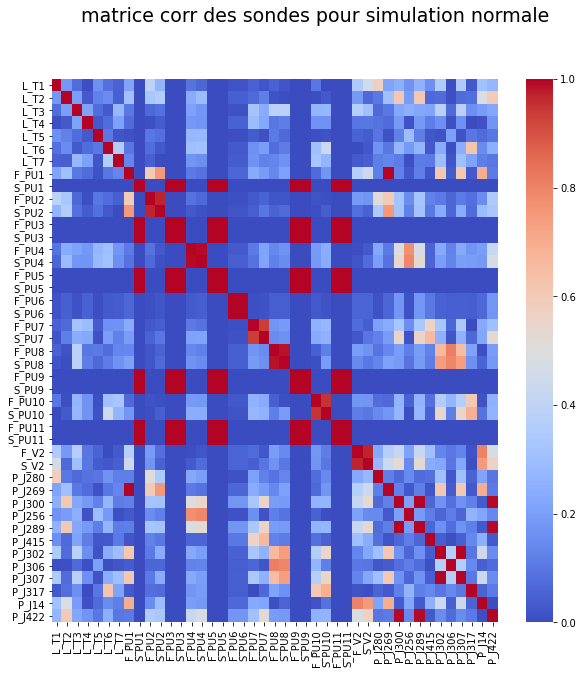

In [14]:

tabcorr=dfLTestLabeled[dfLTestLabeled['ATT_FLAG'] == 0 ].drop(['DATETIME', 'ATT_FLAG'],axis=1).corr()
plt.figure(figsize=(10,10))
plt.suptitle('matrice corr des sondes pour simulation normale  ',fontsize=19)

sns.heatmap(abs(tabcorr), cmap="coolwarm")
    
plt.show()

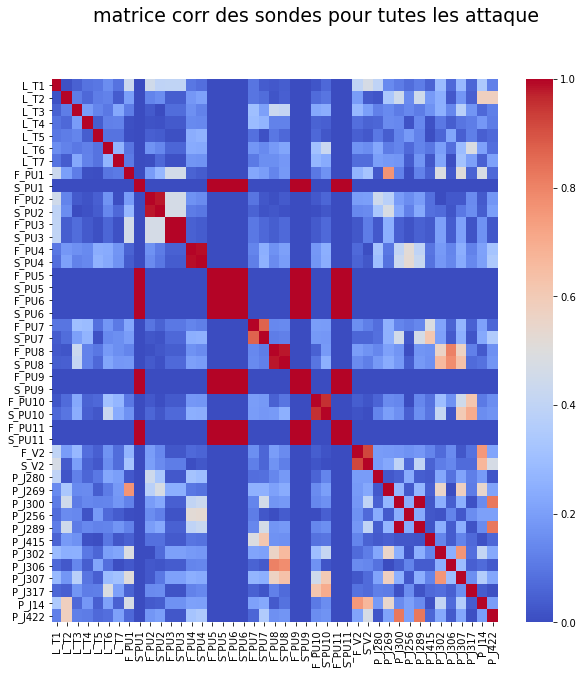

In [22]:

tabcorr=dfLTestLabeled[dfLTestLabeled['ATT_FLAG'] == 1 ].drop(['DATETIME', 'ATT_FLAG'],axis=1).corr()
plt.figure(figsize=(10,10))
plt.suptitle('matrice corr des sondes pour tutes les attaque  ',fontsize=19)

sns.heatmap(abs(tabcorr), cmap="coolwarm")
    
plt.show()

In [13]:
attackTab = {}
indexAttack = 0
boolattack = 0
for lign in range(0,len(dfLTestLabeled)):
    if dfLTestLabeled.iloc[lign].ATT_FLAG == 1:
        if boolattack == 0:
            boolattack = 1
            indexAttack += 1 
        if indexAttack not in attackTab:
            attackTab[indexAttack] = []            
            attackTab[indexAttack].append(dfLTestLabeled.iloc[lign])
        else:
            attackTab[indexAttack].append(dfLTestLabeled.iloc[lign])
    else:
        if boolattack == 1:
            boolattack = 0
    

In [14]:
len(attackTab)

7

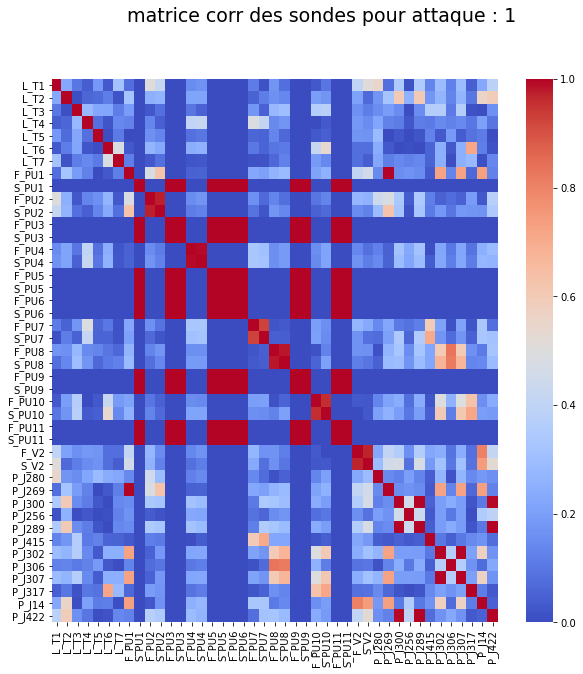

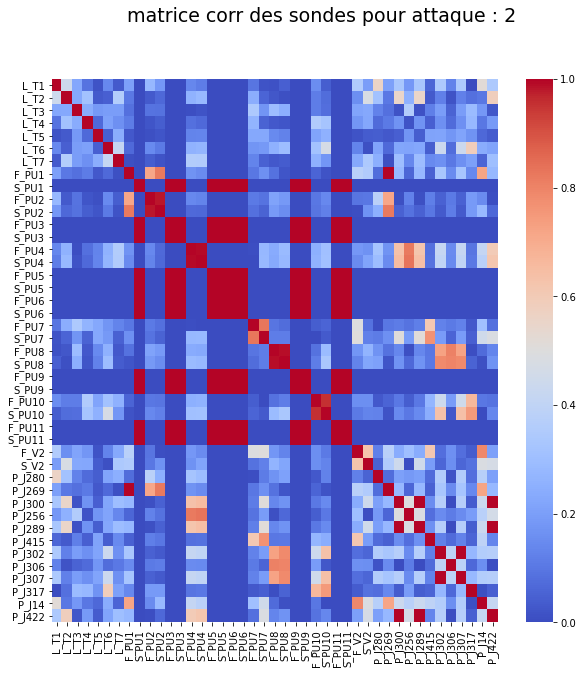

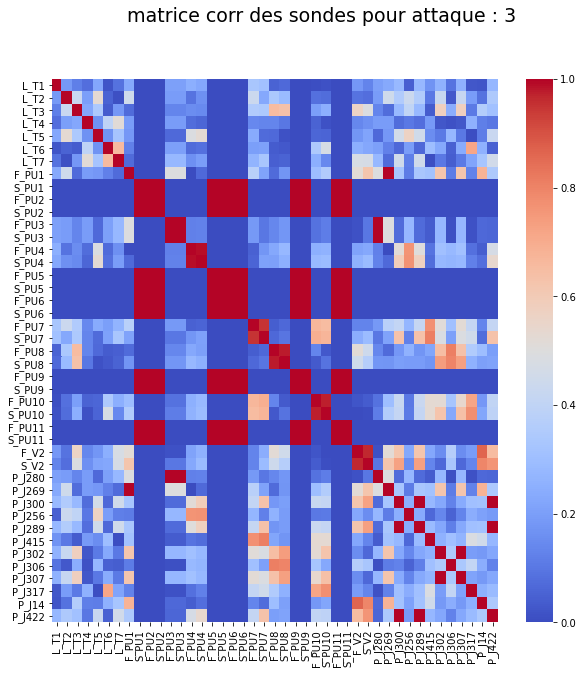

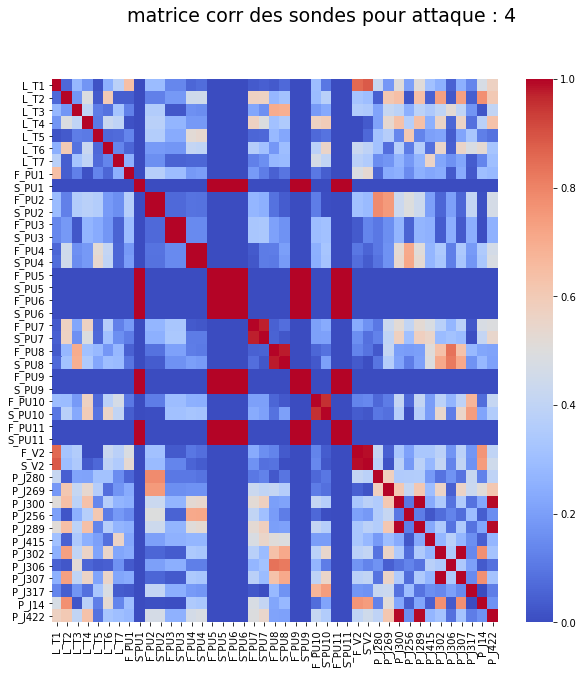

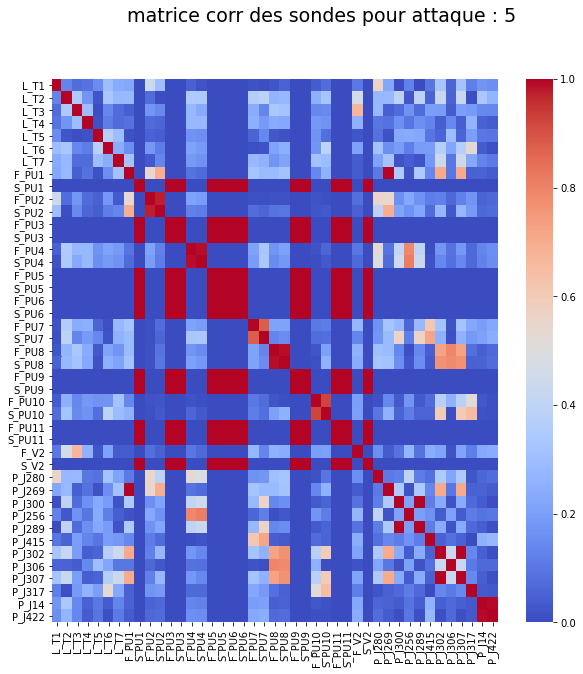

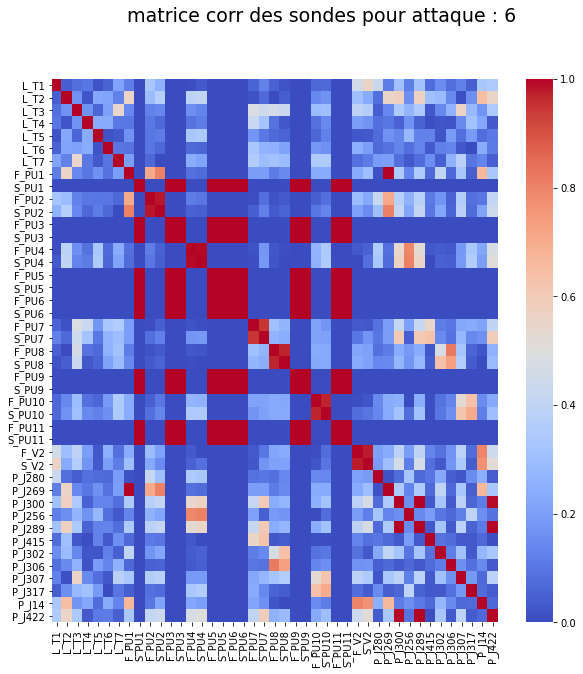

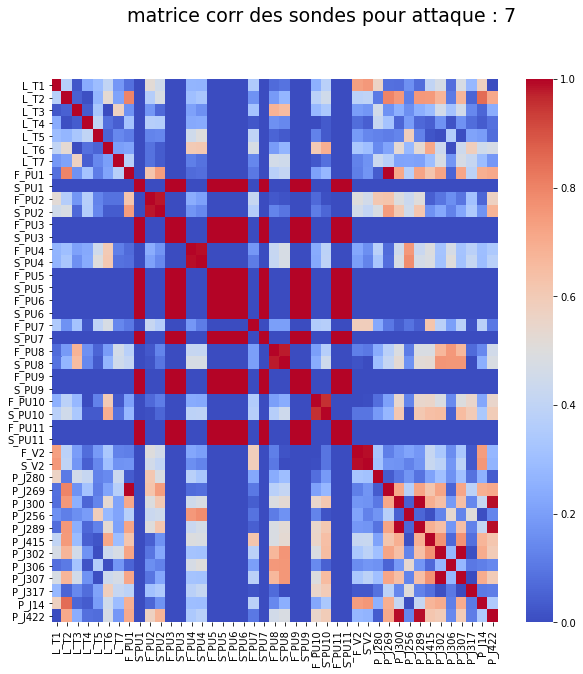

In [29]:
for attackNum in range(1,8):
    tabcorr= pd.DataFrame(attackTab[attackNum]).drop(['DATETIME', 'ATT_FLAG'],axis=1).corr()
    plt.figure(figsize=(10,10))
    plt.suptitle('matrice corr des sondes pour attaque : ' + str(attackNum),fontsize=19)

    sns.heatmap(abs(tabcorr), cmap="coolwarm")

    plt.show()

In [2]:
variablesDiscretes

['S_PU1',
 'S_PU2',
 'S_PU3',
 'S_PU4',
 'S_PU5',
 'S_PU6',
 'S_PU7',
 'S_PU8',
 'S_PU9',
 'S_PU10',
 'S_PU11',
 'S_V2']

In [ ]:
#on constitue des datasets qui vont contenir des matrices de Corr pour chaque point avec une fenêtre de 20 points

In [14]:

data_train = dfLTraining.drop(variablesDiscretes, axis=1)


data_testAttack = dfLTrainingAttack.drop(variablesDiscretes, axis=1)


dfLTestLabeled = dfLTestLabeled.drop(variablesDiscretes, axis=1)

dfLTrainingAttackFullyLabeled = dfLTrainingAttackFullyLabeled.drop(variablesDiscretes, axis=1)
# dfLTestLabeled[dfLTestLabeled.columns.values[1:]] 

In [15]:
import queue 
def GenerationTabCorrelation(Traindata , TrainDataWithAttacks, TestData, fenetreLen = 20 ):
    
    TrainDataSetCorrelation = []
    TrainWithAttackDataSetCorrelation = []
    TestDataSetCorrelation = []
    
    for IndiceGauche in range(0,len(Traindata)-fenetreLen):
        CoorTab = Traindata[IndiceGauche:IndiceGauche+fenetreLen].drop(['DATETIME', 'ATT_FLAG'],axis=1).corr()
        ligne = []
        for indiceColCorrMatrix in range(0,len(CoorTab.columns.values)):
            for indexID in range(indiceColCorrMatrix,len(CoorTab[CoorTab.columns.values[indiceColCorrMatrix]])):
                
                ligne.append(CoorTab[CoorTab.columns.values[indiceColCorrMatrix]][indexID])
        ligne.append(0)
        TrainDataSetCorrelation.append(ligne)
        
    


    labels  = TrainDataWithAttacks['ATT_FLAG'][fenetreLen:]
    for IndiceGauche in range(0,len(TrainDataWithAttacks)-fenetreLen):
        CoorTab = TrainDataWithAttacks[IndiceGauche:IndiceGauche+fenetreLen].drop(['DATETIME', 'ATT_FLAG'],axis=1).corr()
        ligne = []
        for indiceColCorrMatrix in range(0,len(CoorTab.columns.values)):
            for indexID in range(indiceColCorrMatrix,len(CoorTab[CoorTab.columns.values[indiceColCorrMatrix]])):
                
                ligne.append(CoorTab[CoorTab.columns.values[indiceColCorrMatrix]][indexID])
        ligne.append(labels[IndiceGauche+fenetreLen])
        TrainWithAttackDataSetCorrelation.append(ligne)
        
    labels  = TestData['ATT_FLAG'][fenetreLen:]
    for IndiceGauche in range(0,len(TestData)-fenetreLen):
        
        CoorTab = TestData[IndiceGauche:IndiceGauche+fenetreLen].drop(['DATETIME', 'ATT_FLAG'],axis=1).corr()
        ligne = []
        for indiceColCorrMatrix in range(0,len(CoorTab.columns.values)):
            for indexID in range(indiceColCorrMatrix,len(CoorTab[CoorTab.columns.values[indiceColCorrMatrix]])):
                
                ligne.append(CoorTab[CoorTab.columns.values[indiceColCorrMatrix]][indexID])
        ligne.append(labels[IndiceGauche+fenetreLen])
        TestDataSetCorrelation.append(ligne)
        
        
    return (TrainDataSetCorrelation, TrainWithAttackDataSetCorrelation, TestDataSetCorrelation)
        

In [16]:
TupleSetsCorr  = GenerationTabCorrelation(data_train,dfLTrainingAttackFullyLabeled , dfLTestLabeled)

In [17]:
# pour les noms des colonnes :

In [18]:
colNames = []
CoorTab = dfLTestLabeled[0:50].drop(['DATETIME', 'ATT_FLAG'],axis=1).corr()
ligne = []
for indiceColCorrMatrix in range(0,len(CoorTab.columns.values)):
    for indexID in range(indiceColCorrMatrix,len(CoorTab[CoorTab.columns.values[indiceColCorrMatrix]])):
        
        colNames.append(CoorTab.columns.values[indiceColCorrMatrix]+ "/" + CoorTab.columns.values[indexID])
        
colNames.append("ATT_FLAG")

In [19]:
#TrainDataSetCorr = TupleSetsCorr[0]
#TrainDataWithAttackSetCorr = TupleSetsCorr[1]
#TestDataWithAttackSetCorr = TupleSetsCorr[2]

In [20]:
TrainDataSetCorr = pd.DataFrame(TupleSetsCorr[0],columns = colNames).fillna(0).abs()
TrainDataWithAttackSetCorr = pd.DataFrame(TupleSetsCorr[1],columns = colNames).fillna(0).abs()
TestDataWithAttackSetCorr = pd.DataFrame(TupleSetsCorr[2],columns = colNames).fillna(0).abs()

In [22]:
TrainDataSetCorr.to_csv('TrainDataSetCorr.csv',index=False)
TrainDataWithAttackSetCorr.to_csv('TrainDataWithAttackSetCorr.csv',index=False)
TestDataWithAttackSetCorr.to_csv('TestDataWithAttackSetCorr.csv',index=False)

In [23]:

from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.svm import SVC
from sklearn import ensemble

dfF = pd.concat( [ TrainDataWithAttackSetCorr ,  TrainDataSetCorr    ])


data_train = dfF.sample(frac=0.7)
data_test = dfF.drop(data_train.index)


Y_train = data_train['ATT_FLAG'].values
X_train = data_train.drop(['ATT_FLAG'],axis=1).values




Y_test = data_test['ATT_FLAG'].values
X_test = data_test.drop([ 'ATT_FLAG'],axis=1).values


Y_dataset_test = TestDataWithAttackSetCorr['ATT_FLAG'].values
X_dataset_test = TestDataWithAttackSetCorr.drop([ 'ATT_FLAG'],axis=1).values



In [24]:
pd.Series(Y_train).value_counts()

0.0    8673
1.0     356
dtype: int64

test sur le datset de train
0.9935004642525533
[0.99668246 0.84090909]
test sur le datset de test competition
0.819236346060899
[0.8965708 0.2835249]
[[1621   41]
 [ 333   74]]


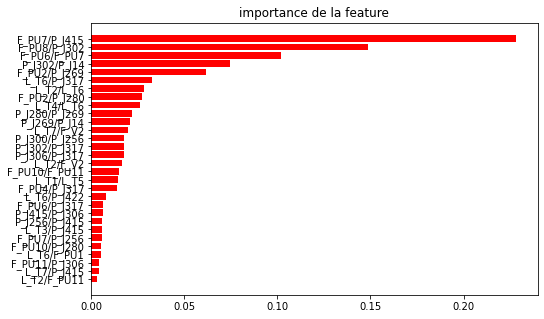

In [61]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,  Y_train)


print("test sur le datset de train")
y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))
importances = model.feature_importances_
indices = np.argsort(importances)[-30:]

plt.figure(figsize=(8,5))
plt.barh(range(len(indices)),importances[indices],color='r',align='center')
plt.yticks(range(len(indices)),dfF.columns[indices])
plt.title("importance de la feature")


print("test sur le datset de test competition")
y_dct = model.predict(X_dataset_test)
print(accuracy_score(Y_dataset_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_dataset_test, y_dct, average=None))


from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_dataset_test,y_dct))



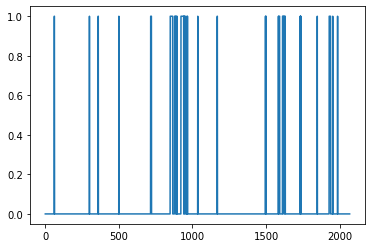

In [66]:
result = []
for indexD in range(0,len(TestDataWithAttackSetCorr)):
    if model.predict(np.array(TestDataWithAttackSetCorr.drop([ 'ATT_FLAG'],axis=1).iloc[indexD]).reshape(1, -1)) == 1:
        result.append(1)
    else:
        result.append(0)
plt.plot(result)

In [ ]:
#pas térrible

In [26]:
model = GradientBoostingClassifier()

model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))


print("test sur le datset de test competition")
y_dct = model.predict(X_dataset_test)
print(accuracy_score(Y_dataset_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_dataset_test, y_dct, average=None))

0.9953574744661096
[0.99763593 0.87179487]
test sur le datset de test competition
0.8153697438376027
[0.89675676 0.12785388]


In [27]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))


print("test sur le datset de test competition")
y_dct = model.predict(X_dataset_test)
print(accuracy_score(Y_dataset_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_dataset_test, y_dct, average=None))



0.9962859795728877
[0.99810785 0.9       ]
test sur le datset de test competition
0.8028032866118898
[0.89061662 0.        ]


In [32]:
from sklearn.neural_network import MLPClassifier


model = MLPClassifier(hidden_layer_sizes = (20,5), random_state=1, max_iter=300)

model.fit(X_train,  Y_train)

y_dct = model.predict(X_test)
print(accuracy_score(Y_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_test, y_dct, average=None))


print("test sur le datset de test competition")
y_dct = model.predict(X_dataset_test)
print(accuracy_score(Y_dataset_test,   y_dct))
from sklearn.metrics import f1_score
print(f1_score(Y_dataset_test, y_dct, average=None))


0.9948932219127206
[0.99739522 0.87058824]
test sur le datset de test competition
0.7979700338327694
[0.88714903 0.03686636]


In [111]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor( contamination=0.05, novelty=True).fit(TrainDataSetCorr.drop([ 'ATT_FLAG'],axis=1))




res = clf.predict(TestDataWithAttackSetCorr[TestDataWithAttackSetCorr.ATT_FLAG == 0].drop([ 'ATT_FLAG'],axis=1))
print("prédiction valeurs normales   (test set)")
print(pd.Series(res).value_counts())

res = clf.predict(TestDataWithAttackSetCorr[TestDataWithAttackSetCorr.ATT_FLAG == 1].drop([ 'ATT_FLAG'],axis=1))
print("prédiction valeurs Anormales    (test set)")
print(pd.Series(res).value_counts())

prédiction valeurs normales   (test set)
 1    962
-1    700
dtype: int64
prédiction valeurs Anormales    (test set)
-1    375
 1     32
dtype: int64


In [ ]:
#ne fonctionne pas

In [33]:
temptrain = pd.concat( [ TrainDataWithAttackSetCorr[TrainDataWithAttackSetCorr.ATT_FLAG == 0] ,  TrainDataSetCorr    ])

from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor( contamination=0.03, novelty=True).fit(temptrain.drop([ 'ATT_FLAG'],axis=1))




res = clf.predict(TestDataWithAttackSetCorr[TestDataWithAttackSetCorr.ATT_FLAG == 0].drop([ 'ATT_FLAG'],axis=1))
print("prédiction valeurs normales   (test set)")
print(pd.Series(res).value_counts())

res = clf.predict(TestDataWithAttackSetCorr[TestDataWithAttackSetCorr.ATT_FLAG == 1].drop([ 'ATT_FLAG'],axis=1))
print("prédiction valeurs Anormales    (test set)")
print(pd.Series(res).value_counts())

prédiction valeurs normales   (test set)
 1    1419
-1     243
dtype: int64
prédiction valeurs Anormales    (test set)
-1    327
 1     80
dtype: int64


In [ ]:
#trop de faux positifs

In [34]:
temptrain = pd.concat( [ TrainDataWithAttackSetCorr[TrainDataWithAttackSetCorr.ATT_FLAG == 0] ,  TrainDataSetCorr    ])

from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor( contamination=0.05, novelty=True).fit(temptrain.drop([ 'ATT_FLAG'],axis=1))




res = clf.predict(TestDataWithAttackSetCorr[TestDataWithAttackSetCorr.ATT_FLAG == 0].drop([ 'ATT_FLAG'],axis=1))
print("prédiction valeurs normales   (test set)")
print(pd.Series(res).value_counts())

res = clf.predict(TestDataWithAttackSetCorr[TestDataWithAttackSetCorr.ATT_FLAG == 1].drop([ 'ATT_FLAG'],axis=1))
print("prédiction valeurs Anormales    (test set)")
print(pd.Series(res).value_counts())

prédiction valeurs normales   (test set)
 1    1338
-1     324
dtype: int64
prédiction valeurs Anormales    (test set)
-1    352
 1     55
dtype: int64


In [ ]:
#trop de faux positifs

In [40]:
temptrain = pd.concat( [ TrainDataWithAttackSetCorr[TrainDataWithAttackSetCorr.ATT_FLAG == 0] ,  TrainDataSetCorr    ])

from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor( contamination=0.07, novelty=True, metric = 'cosine').fit(temptrain.drop([ 'ATT_FLAG'],axis=1))




res = clf.predict(TestDataWithAttackSetCorr[TestDataWithAttackSetCorr.ATT_FLAG == 0].drop([ 'ATT_FLAG'],axis=1))
print("prédiction valeurs normales   (test set)")
print(pd.Series(res).value_counts())

res = clf.predict(TestDataWithAttackSetCorr[TestDataWithAttackSetCorr.ATT_FLAG == 1].drop([ 'ATT_FLAG'],axis=1))
print("prédiction valeurs Anormales    (test set)")
print(pd.Series(res).value_counts())

prédiction valeurs normales   (test set)
 1    1221
-1     441
dtype: int64
prédiction valeurs Anormales    (test set)
-1    365
 1     42
dtype: int64


In [ ]:
#trop de faux positifs

In [41]:
temptrain = pd.concat( [ TrainDataWithAttackSetCorr[TrainDataWithAttackSetCorr.ATT_FLAG == 0] ,  TrainDataSetCorr    ])

from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor( contamination=0.07, novelty=True, metric = 'braycurtis').fit(temptrain.drop([ 'ATT_FLAG'],axis=1))




res = clf.predict(TestDataWithAttackSetCorr[TestDataWithAttackSetCorr.ATT_FLAG == 0].drop([ 'ATT_FLAG'],axis=1))
print("prédiction valeurs normales   (test set)")
print(pd.Series(res).value_counts())

res = clf.predict(TestDataWithAttackSetCorr[TestDataWithAttackSetCorr.ATT_FLAG == 1].drop([ 'ATT_FLAG'],axis=1))
print("prédiction valeurs Anormales    (test set)")
print(pd.Series(res).value_counts())

prédiction valeurs normales   (test set)
 1    1189
-1     473
dtype: int64
prédiction valeurs Anormales    (test set)
-1    370
 1     37
dtype: int64


In [ ]:
#trop de faux positifs

In [42]:
temptrain = pd.concat( [ TrainDataWithAttackSetCorr[TrainDataWithAttackSetCorr.ATT_FLAG == 0] ,  TrainDataSetCorr    ])

from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor( contamination=0.07, novelty=True, metric = 'chebyshev').fit(temptrain.drop([ 'ATT_FLAG'],axis=1))




res = clf.predict(TestDataWithAttackSetCorr[TestDataWithAttackSetCorr.ATT_FLAG == 0].drop([ 'ATT_FLAG'],axis=1))
print("prédiction valeurs normales   (test set)")
print(pd.Series(res).value_counts())

res = clf.predict(TestDataWithAttackSetCorr[TestDataWithAttackSetCorr.ATT_FLAG == 1].drop([ 'ATT_FLAG'],axis=1))
print("prédiction valeurs Anormales    (test set)")
print(pd.Series(res).value_counts())

prédiction valeurs normales   (test set)
 1    1301
-1     361
dtype: int64
prédiction valeurs Anormales    (test set)
-1    347
 1     60
dtype: int64


In [ ]:
#trop de faux positifs

In [35]:
from sklearn.covariance import EllipticEnvelope

temptrain = pd.concat( [ TrainDataWithAttackSetCorr[TrainDataWithAttackSetCorr.ATT_FLAG == 0] ,  TrainDataSetCorr    ])

clf = EllipticEnvelope( contamination=0.02,assume_centered =True).fit(temptrain.drop([ 'ATT_FLAG'],axis=1))




res = clf.predict(TestDataWithAttackSetCorr[TestDataWithAttackSetCorr.ATT_FLAG == 0].drop([ 'ATT_FLAG'],axis=1))
print("prédiction valeurs normales   (test set)")
print(pd.Series(res).value_counts())

res = clf.predict(TestDataWithAttackSetCorr[TestDataWithAttackSetCorr.ATT_FLAG == 1].drop([ 'ATT_FLAG'],axis=1))
print("prédiction valeurs Anormales    (test set)")
print(pd.Series(res).value_counts())

/home/AI357/.local/lib/python3.6/site-packages/sklearn/covariance/_robust_covariance.py:647: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


prédiction valeurs normales   (test set)
 1    1571
-1      91
dtype: int64
prédiction valeurs Anormales    (test set)
-1    290
 1    117
dtype: int64


In [ ]:
#pas mal, mais encore un peu trop de faux positifs

In [43]:
from sklearn.covariance import EllipticEnvelope

temptrain = pd.concat( [ TrainDataWithAttackSetCorr[TrainDataWithAttackSetCorr.ATT_FLAG == 0] ,  TrainDataSetCorr    ])

clf = EllipticEnvelope( contamination=0.01,assume_centered =True).fit(temptrain.drop([ 'ATT_FLAG'],axis=1))




res = clf.predict(TestDataWithAttackSetCorr[TestDataWithAttackSetCorr.ATT_FLAG == 0].drop([ 'ATT_FLAG'],axis=1))
print("prédiction valeurs normales   (test set)")
print(pd.Series(res).value_counts())

res = clf.predict(TestDataWithAttackSetCorr[TestDataWithAttackSetCorr.ATT_FLAG == 1].drop([ 'ATT_FLAG'],axis=1))
print("prédiction valeurs Anormales    (test set)")
print(pd.Series(res).value_counts())

/home/AI357/.local/lib/python3.6/site-packages/sklearn/covariance/_robust_covariance.py:647: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


prédiction valeurs normales   (test set)
 1    1598
-1      64
dtype: int64
prédiction valeurs Anormales    (test set)
-1    275
 1    132
dtype: int64


In [59]:
result = []
for indexD in range(0,len(TestDataWithAttackSetCorr)):
    if clf.predict(np.array(TestDataWithAttackSetCorr.drop([ 'ATT_FLAG'],axis=1).iloc[indexD]).reshape(1, -1))[0] == -1:
        result.append(1)
    else:
        result.append(0)

In [1]:
64/(64+1598)

0.03850782190132371

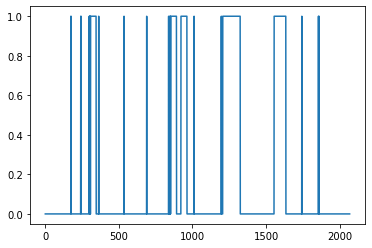

In [60]:
plt.plot(result)

In [ ]:
# pas mauvais mais encore des faux positifs

In [21]:
from sklearn.covariance import EllipticEnvelope

temptrain = pd.concat( [ TrainDataWithAttackSetCorr[TrainDataWithAttackSetCorr.ATT_FLAG == 0] ,  TrainDataSetCorr    ])

clf = EllipticEnvelope( contamination=0.004,assume_centered =True).fit(temptrain.drop([ 'ATT_FLAG'],axis=1))


#50 255

res = clf.predict(TestDataWithAttackSetCorr[TestDataWithAttackSetCorr.ATT_FLAG == 0].drop([ 'ATT_FLAG'],axis=1))
print("prédiction valeurs normales   (test set)")
print(pd.Series(res).value_counts())

res = clf.predict(TestDataWithAttackSetCorr[TestDataWithAttackSetCorr.ATT_FLAG == 1].drop([ 'ATT_FLAG'],axis=1))
print("prédiction valeurs Anormales    (test set)")
print(pd.Series(res).value_counts())

/home/AI357/.local/lib/python3.6/site-packages/sklearn/covariance/_robust_covariance.py:647: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


prédiction valeurs normales   (test set)
 1    1613
-1      49
dtype: int64
prédiction valeurs Anormales    (test set)
-1    253
 1    154
dtype: int64


In [4]:
#accuracy :
print((1613 + 253)/(1613 + 253 + 49 + 154))


#precision socre
print((253)/(253+49))

#recall socre
print((253)/(253+154))

#f1 score
print(2*((((253)/(253+154))*((253)/(253+49))))/((((253)/(253+154))+((253)/(253+49)))))

#faut positifs:
print(49/(49+1613))

0.9018849685838569
0.8377483443708609
0.6216216216216216
0.7136812411847672
0.029482551143200964


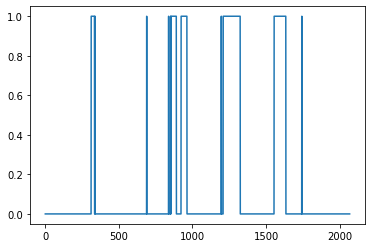

In [22]:
result = []
for indexD in range(0,len(TestDataWithAttackSetCorr)):
    if clf.predict(np.array(TestDataWithAttackSetCorr.drop([ 'ATT_FLAG'],axis=1).iloc[indexD]).reshape(1, -1))[0] == -1:
        result.append(1)
    else:
        result.append(0)
plt.plot(result)

In [23]:
pd.Series(result).to_csv('correlationResultLen20.csv')

In [ ]:
#bon modèle alors on enregistre

In [37]:
from sklearn.svm import OneClassSVM 
temptrain = pd.concat( [ TrainDataWithAttackSetCorr[TrainDataWithAttackSetCorr.ATT_FLAG == 0] ,  TrainDataSetCorr    ])


clf = OneClassSVM( nu=0.005,verbose=True).fit(temptrain.drop([ 'ATT_FLAG'],axis=1))




res = clf.predict(TestDataWithAttackSetCorr[TestDataWithAttackSetCorr.ATT_FLAG == 0].drop([ 'ATT_FLAG'],axis=1))
print("prédiction valeurs normales   (test set)")
print(pd.Series(res).value_counts())

res = clf.predict(TestDataWithAttackSetCorr[TestDataWithAttackSetCorr.ATT_FLAG == 1].drop([ 'ATT_FLAG'],axis=1))
print("prédiction valeurs Anormales    (test set)")
print(pd.Series(res).value_counts())

[LibSVM]prédiction valeurs normales   (test set)
 1    1613
-1      49
dtype: int64
prédiction valeurs Anormales    (test set)
 1    315
-1     92
dtype: int64


In [ ]:
#fonctionne pas

In [38]:
from sklearn.svm import OneClassSVM 
temptrain = pd.concat( [ TrainDataWithAttackSetCorr[TrainDataWithAttackSetCorr.ATT_FLAG == 0] ,  TrainDataSetCorr    ])


clf = OneClassSVM( nu=0.05,verbose=True).fit(temptrain.drop([ 'ATT_FLAG'],axis=1))




res = clf.predict(TestDataWithAttackSetCorr[TestDataWithAttackSetCorr.ATT_FLAG == 0].drop([ 'ATT_FLAG'],axis=1))
print("prédiction valeurs normales   (test set)")
print(pd.Series(res).value_counts())

res = clf.predict(TestDataWithAttackSetCorr[TestDataWithAttackSetCorr.ATT_FLAG == 1].drop([ 'ATT_FLAG'],axis=1))
print("prédiction valeurs Anormales    (test set)")
print(pd.Series(res).value_counts())

[LibSVM]prédiction valeurs normales   (test set)
 1    1512
-1     150
dtype: int64
prédiction valeurs Anormales    (test set)
 1    247
-1    160
dtype: int64


In [ ]:
#fonctionne pas

In [39]:
from sklearn.ensemble import IsolationForest

temptrain = pd.concat( [ TrainDataWithAttackSetCorr[TrainDataWithAttackSetCorr.ATT_FLAG == 0] ,  TrainDataSetCorr    ])

clf = IsolationForest(n_estimators = 200).fit(temptrain.drop([ 'ATT_FLAG'],axis=1))




res = clf.predict(TestDataWithAttackSetCorr[TestDataWithAttackSetCorr.ATT_FLAG == 0].drop([ 'ATT_FLAG'],axis=1))
print("prédiction valeurs normales   (test set)")
print(pd.Series(res).value_counts())

res = clf.predict(TestDataWithAttackSetCorr[TestDataWithAttackSetCorr.ATT_FLAG == 1].drop([ 'ATT_FLAG'],axis=1))
print("prédiction valeurs Anormales    (test set)")
print(pd.Series(res).value_counts())

prédiction valeurs normales   (test set)
 1    1605
-1      57
dtype: int64
prédiction valeurs Anormales    (test set)
 1    374
-1     33
dtype: int64


In [ ]:
#fonctionne pas